In [1]:
# Data Dictionary

In [2]:
# Importing the libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.metrics import mean_squared_error, r2_score
import random
import math

In [54]:
# Reading the dataset
enem = pd.read_csv("enem_complete.csv")
enem.head(3)

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,1,23246847,FARIAS BRITO COLEGIO DE APLICACAO,Ceará,Fortaleza,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,2,23246871,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,Ceará,Fortaleza,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,3,31350664,COLEGIO BERNOULLI,Minas Gerais,Belo Horizonte,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94


# EDA

# Data Preparation

In [5]:
# copying df
df_preparing = enem.copy()
df_preparing.head(3)

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,1,23246847,FARIAS BRITO COLEGIO DE APLICACAO,Ceará,Fortaleza,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,2,23246871,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,Ceará,Fortaleza,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,3,31350664,COLEGIO BERNOULLI,Minas Gerais,Belo Horizonte,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94


In [6]:
# Dropping unnecessary columns
df_preparing.drop(["rank", "inep_code", 'school', 'city'], axis=1, inplace=True)
df_preparing.head(3)

,state,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,Ceará,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,Ceará,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,Minas Gerais,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94


In [7]:
def sub(x):
    
    # North
    if x == 'Amazonas' or x =='Roraima' or x =='Amapá' or x =='Pará' or x =='Tocantins' or x =='Rondônia' or x =='Acre':
        return "North"
    
    # Northeast
    elif x == 'Maranhão' or x =='Piauí' or x =='Ceará' or x =='Pernambuco' or x =='Paraíba' or x =='Rio Grande do Norte' or x =='Sergipe' or x =='Alagoas' or x =='Bahia':
        return "Northeast"
    
    # Midwest
    elif x == 'Mato Grosso' or x =='Mato Grosso do Sul' or x =='Goiás':
        return "Midwest"
    
    
    # Southeast
    elif x == 'São Paulo' or x =='Minas Gerais' or x =='Rio de Janeiro' or x =='Espirito Santo':
        return "Southeast"
    
    # South
    elif x == 'Paraná' or x =='Rio Grande do Sul' or x =='Santa Catarina':
        return "South"
    
    elif x == 'Distrito Federal':
        return "Federal District"

In [8]:
df_preparing['region'] = df_preparing['state'].apply(lambda x: sub(x))

In [9]:
df_preparing

,state,school_type,location,students,ch,cn,lc,mt,rd,average_exam,region
0,Ceará,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18,Northeast
1,Ceará,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34,Northeast
2,Minas Gerais,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94,Southeast
3,São Paulo,Privada,Urbana,53,677.45,682.90,638.72,836.11,868.68,740.77,Southeast
4,Minas Gerais,Privada,Urbana,57,666.41,657.87,630.84,809.55,938.95,740.72,Southeast
...,...,...,...,...,...,...,...,...,...,...,...
19593,Tocantins,Estadual,Rural,10,423.49,412.24,386.12,449.16,284.00,391.00,North
19594,Maranhão,Estadual,Urbana,16,439.87,409.58,431.09,411.73,261.25,390.70,Northeast
19595,Amazonas,Estadual,Rural,56,422.24,407.61,411.16,425.47,241.79,381.65,North
19596,Amazonas,Estadual,Rural,21,432.40,405.50,377.89,441.75,154.29,362.36,North


In [10]:
df_preparing['region'].unique()

array(['Northeast', 'Southeast', 'Federal District', 'Midwest', 'North',
       'South'], dtype=object)

# Ideas do Larry

# Unsupervised Learning

In [12]:
df_preparing.head(2)

,state,school_type,location,students,ch,cn,lc,mt,rd,average_exam,region
0,Ceará,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18,Northeast
1,Ceará,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34,Northeast


In [13]:
df_school_type = df_preparing.drop(['state', 'location', 'average_exam', 'region'], axis = 1)
df_school_type.head(2)

,school_type,students,ch,cn,lc,mt,rd
0,Privada,35,692.85,674.50,652.24,845.89,935.43
1,Privada,33,695.67,676.34,652.91,836.65,915.15


# KMeans

In [14]:
df_cluster_KMeans = df_school_type.drop('school_type', axis = 1)
df_cluster_KMeans

,students,ch,cn,lc,mt,rd
0,35,692.85,674.50,652.24,845.89,935.43
1,33,695.67,676.34,652.91,836.65,915.15
2,280,681.58,668.20,634.47,823.80,906.64
3,53,677.45,682.90,638.72,836.11,868.68
4,57,666.41,657.87,630.84,809.55,938.95
...,...,...,...,...,...,...
19593,10,423.49,412.24,386.12,449.16,284.00
19594,16,439.87,409.58,431.09,411.73,261.25
19595,56,422.24,407.61,411.16,425.47,241.79
19596,21,432.40,405.50,377.89,441.75,154.29


In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [17]:
kmeans.fit(df_cluster_KMeans)

KMeans(n_clusters=2, random_state=0)

In [18]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
df_school_type['cluster_KMeans'] = kmeans.labels_

In [20]:
df_school_type

,school_type,students,ch,cn,lc,mt,rd,cluster_KMeans
0,Privada,35,692.85,674.50,652.24,845.89,935.43,0
1,Privada,33,695.67,676.34,652.91,836.65,915.15,0
2,Privada,280,681.58,668.20,634.47,823.80,906.64,0
3,Privada,53,677.45,682.90,638.72,836.11,868.68,0
4,Privada,57,666.41,657.87,630.84,809.55,938.95,0
...,...,...,...,...,...,...,...,...
19593,Estadual,10,423.49,412.24,386.12,449.16,284.00,1
19594,Estadual,16,439.87,409.58,431.09,411.73,261.25,1
19595,Estadual,56,422.24,407.61,411.16,425.47,241.79,1
19596,Estadual,21,432.40,405.50,377.89,441.75,154.29,1


# KMedoids

In [21]:
df_cluster_KMedoid = df_school_type.drop(['school_type', 'cluster_KMeans'], axis = 1)
df_cluster_KMedoid

,students,ch,cn,lc,mt,rd
0,35,692.85,674.50,652.24,845.89,935.43
1,33,695.67,676.34,652.91,836.65,915.15
2,280,681.58,668.20,634.47,823.80,906.64
3,53,677.45,682.90,638.72,836.11,868.68
4,57,666.41,657.87,630.84,809.55,938.95
...,...,...,...,...,...,...
19593,10,423.49,412.24,386.12,449.16,284.00
19594,16,439.87,409.58,431.09,411.73,261.25
19595,56,422.24,407.61,411.16,425.47,241.79
19596,21,432.40,405.50,377.89,441.75,154.29


In [22]:
from sklearn_extra.cluster import KMedoids

In [23]:
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(df_cluster_KMedoid)

In [24]:
kmedoids.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [25]:
df_school_type['cluster_KMedoids'] = kmedoids.labels_
df_school_type

,school_type,students,ch,cn,lc,mt,rd,cluster_KMeans,cluster_KMedoids
0,Privada,35,692.85,674.50,652.24,845.89,935.43,0,0
1,Privada,33,695.67,676.34,652.91,836.65,915.15,0,0
2,Privada,280,681.58,668.20,634.47,823.80,906.64,0,0
3,Privada,53,677.45,682.90,638.72,836.11,868.68,0,0
4,Privada,57,666.41,657.87,630.84,809.55,938.95,0,0
...,...,...,...,...,...,...,...,...,...
19593,Estadual,10,423.49,412.24,386.12,449.16,284.00,1,1
19594,Estadual,16,439.87,409.58,431.09,411.73,261.25,1,1
19595,Estadual,56,422.24,407.61,411.16,425.47,241.79,1,1
19596,Estadual,21,432.40,405.50,377.89,441.75,154.29,1,1


# Comparinng

### Original

In [26]:
df_school_type = df_school_type.reindex(['students', 'ch', 'cn', 'lc', 'mt', 'rd', 'school_type', 'cluster_KMeans', 'cluster_KMedoids' ], axis=1)

In [27]:
df_school_type.head(2)

,students,ch,cn,lc,mt,rd,school_type,cluster_KMeans,cluster_KMedoids
0,35,692.85,674.50,652.24,845.89,935.43,Privada,0,0
1,33,695.67,676.34,652.91,836.65,915.15,Privada,0,0


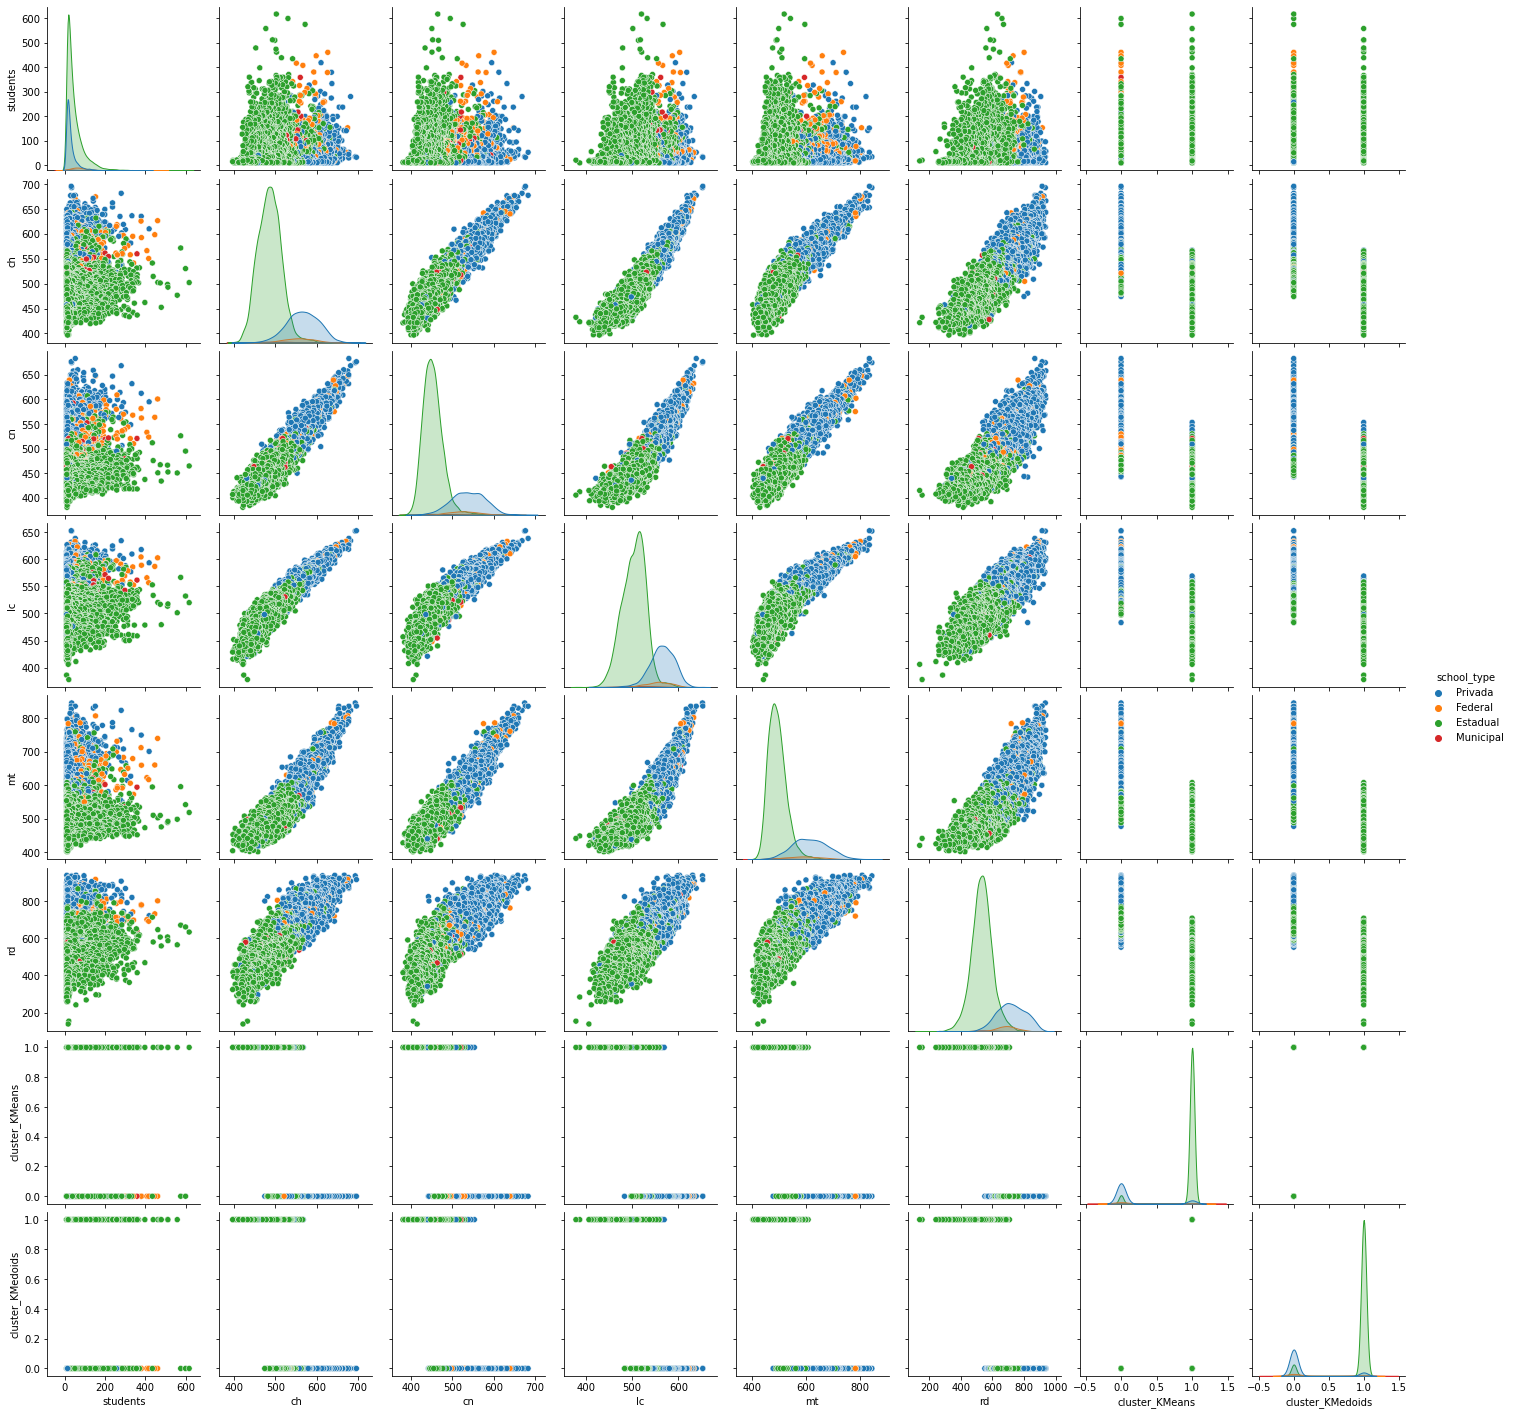

In [28]:
sns.pairplot(df_school_type, hue='school_type')

### KMeans

C:\Users\laerc\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


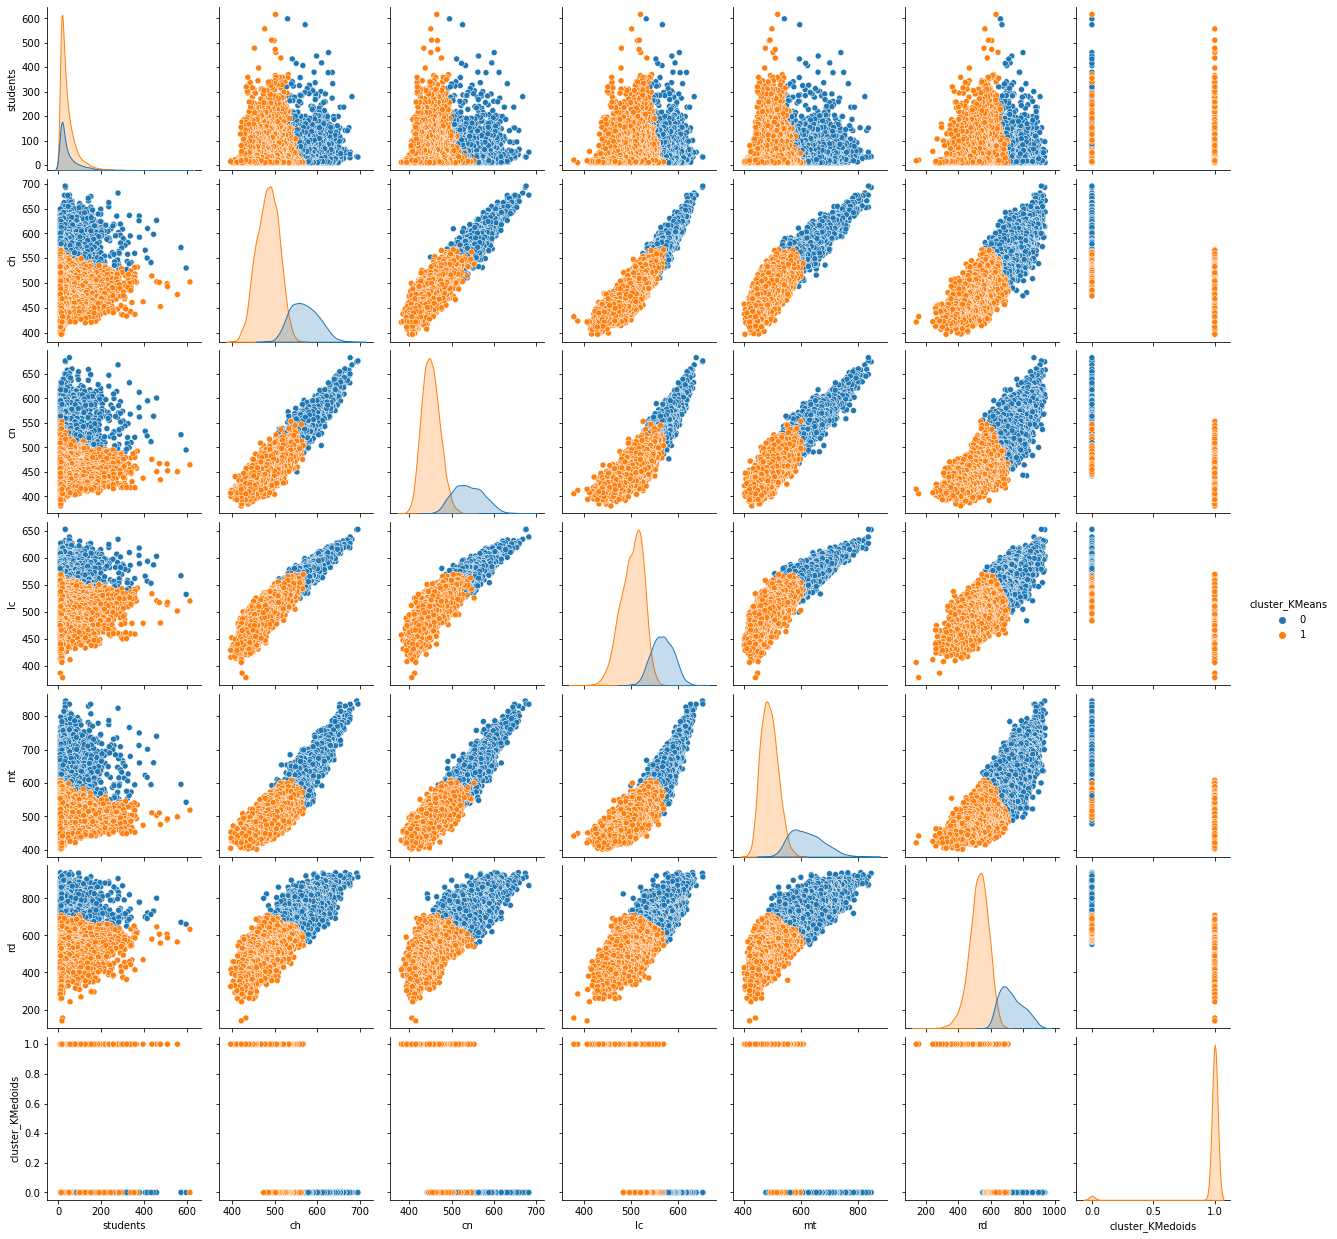

In [29]:
sns.pairplot(df_school_type, hue='cluster_KMeans')

### KMedoid

C:\Users\laerc\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


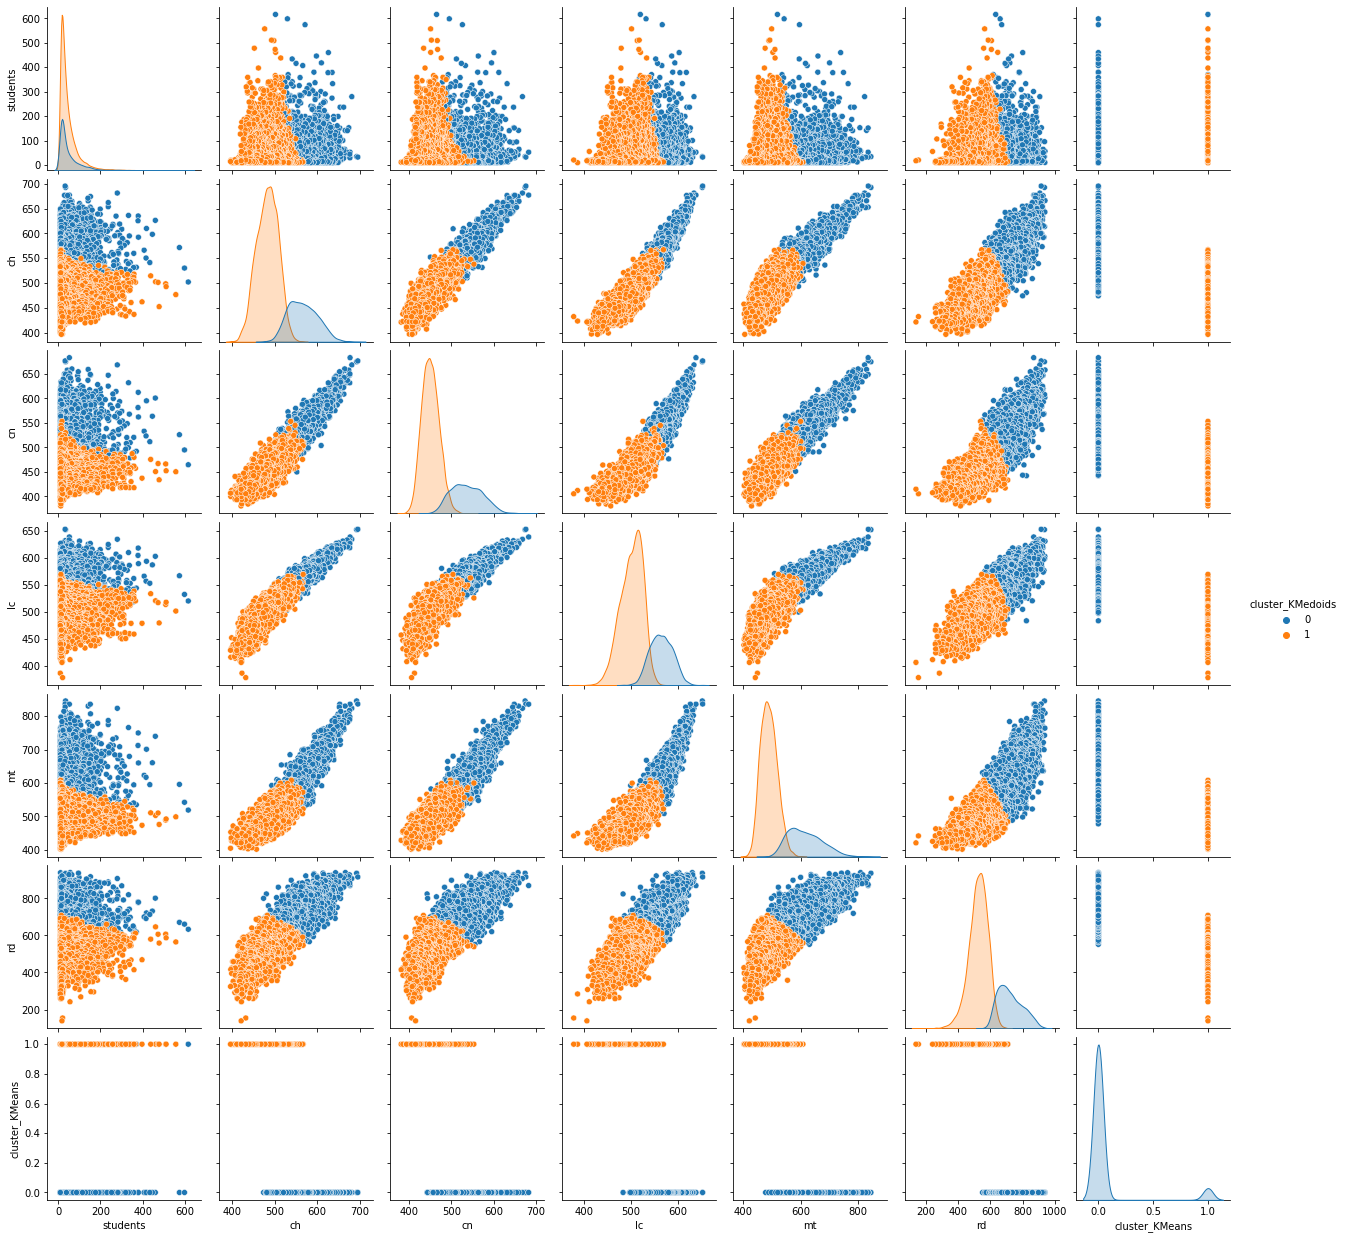

In [30]:
sns.pairplot(df_school_type, hue='cluster_KMedoids')

# Supervised Learning

### Encoding

In [59]:
df_preparing.head(2)

,state,school_type,location,students,ch,cn,lc,mt,rd,average_exam,region
0,Ceará,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18,Northeast
1,Ceará,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34,Northeast


In [60]:
# Encoding the categorical variables
df_encoded = pd.get_dummies(df_preparing, columns = ['school_type', 'location', 'region'])
df_encoded.head(3)

,state,students,ch,cn,lc,mt,rd,average_exam,school_type_Estadual,school_type_Federal,school_type_Municipal,school_type_Privada,location_Rural,location_Urbana,region_Federal District,region_Midwest,region_North,region_Northeast,region_South,region_Southeast
0,Ceará,35,692.85,674.50,652.24,845.89,935.43,760.18,0,0,0,1,0,1,0,0,0,1,0,0
1,Ceará,33,695.67,676.34,652.91,836.65,915.15,755.34,0,0,0,1,0,1,0,0,0,1,0,0
2,Minas Gerais,280,681.58,668.20,634.47,823.80,906.64,742.94,0,0,0,1,0,1,0,0,0,0,0,1


In [61]:
df_encoded = df_encoded.drop(['state', 'average_exam'], axis=1)

### Correlation Analysis

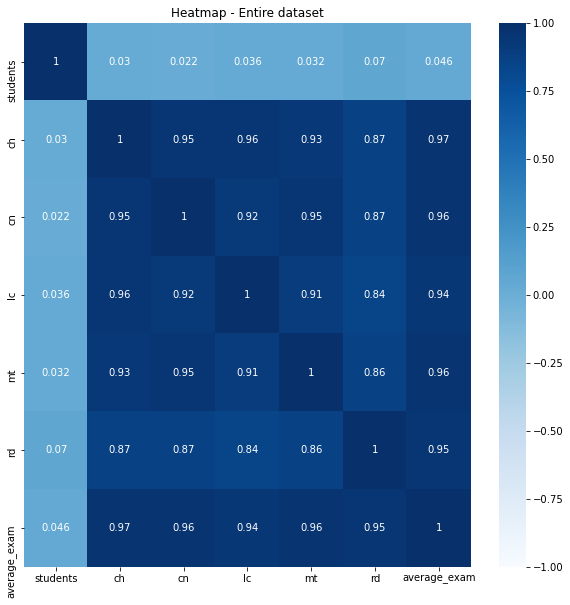

In [62]:
# Checking variables' relation
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_preparing.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='Blues').set(title='Heatmap - Entire dataset')

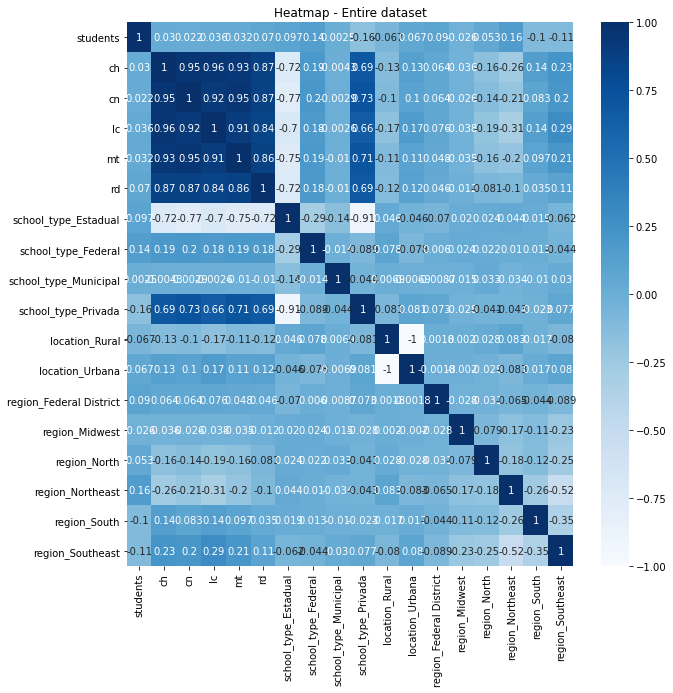

In [63]:
# Checking variables' relation
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_encoded.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='Blues').set(title='Heatmap - Entire dataset')

# Models

In [64]:
# Spliting the dataset
from sklearn.model_selection import train_test_split
X = df_encoded.drop('rd', axis=1)
y = df_encoded['rd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)




In [65]:
X_train

,students,ch,cn,lc,mt,school_type_Estadual,school_type_Federal,school_type_Municipal,school_type_Privada,location_Rural,location_Urbana,region_Federal District,region_Midwest,region_North,region_Northeast,region_South,region_Southeast
7218,27,515.26,488.45,517.59,525.76,1,0,0,0,0,1,0,0,0,0,1,0
4664,81,530.05,484.73,540.94,577.28,1,0,0,0,0,1,0,0,0,0,1,0
18809,24,444.25,418.55,460.75,440.99,1,0,0,0,0,1,0,0,1,0,0,0
6220,65,514.40,484.92,524.28,522.65,1,0,0,0,0,1,0,1,0,0,0,0
13620,63,472.71,440.13,485.53,463.92,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,28,507.50,461.88,534.15,481.63,1,0,0,0,0,1,0,0,0,0,1,0
13123,135,479.15,445.15,491.64,479.33,1,0,0,0,0,1,0,0,0,1,0,0
9845,25,490.86,450.38,506.48,504.30,1,0,0,0,0,1,0,0,0,0,0,1
10799,68,491.33,451.01,512.82,487.35,1,0,0,0,0,1,0,1,0,0,0,0


In [66]:
# X_train= X_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)

In [67]:
from sklearn.linear_model import LinearRegression


# Training the model on the Training set
regressor_LR = LinearRegression()
regressor_LR.fit(X_train, y_train)

LinearRegression()

### Precision

In [68]:
# Precision of the model - Train set
print('The precision of the model is ')
print(regressor_LR.score(X_train, y_train))

The precision of the model is 
0.808035667341362


In [69]:
# Precision of the model - Test set
y_pred = regressor_LR.predict(X_test)

R_square = r2_score(y_test,y_pred) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.8093688707686231
